data.shape(181, 3)


,sim1,sim2,sim3
timestamp,,,
2023-05-13 11:44:42.840000-07:00,0.0389,1.0375,2.0370
2023-05-13 11:44:43.869000-07:00,0.7953,1.7660,2.7532
2023-05-13 11:44:44.989000-07:00,1.2240,2.2297,3.2119
2023-05-13 11:44:46.074000-07:00,1.4414,2.5315,3.5226
2023-05-13 11:44:47.177000-07:00,1.6061,2.7468,3.7610


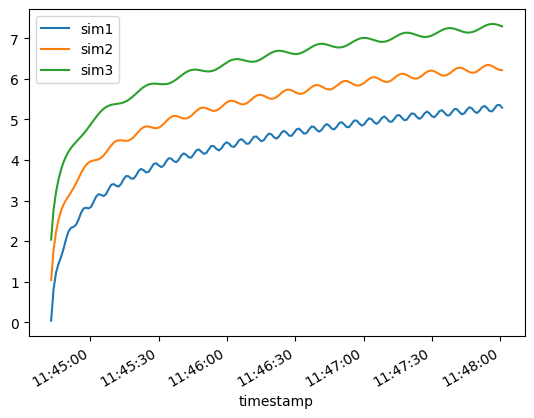

In [40]:
import linecache
import pandas as pd  # https://pandas.pydata.org/pandas-docs/stable/reference/index.html

data_file = "..\\data_log.csv"

sensor_count = int(linecache.getline(data_file, 1).split(',')[-1].strip())
start_timestamp = linecache.getline(data_file, 2).split(',')[-1].strip()

data = pd.read_csv(
    data_file,
    header=3 + sensor_count,
    index_col="timestamp",
    parse_dates=["timestamp"],
)
print(f"data.shape{data.shape}")
display(data.head())
axes = data.plot.line()

In [41]:
sensor_traits = pd.read_csv(
    data_file,
    header=2,
    index_col="name",
    nrows=sensor_count,
)
print(f"sensor_traits.shape{sensor_traits.shape}")
display(sensor_traits)

sensor_traits.shape(3, 6)


,Vex,CF,X0,Units,Sensor,IO Device
name,,,,,,
sim1,1.0,1.0,0.5,V,Voltage,9219
sim2,1.0,1.0,1.5,mm,Voltage,9219
sim3,1.0,1.0,2.5,lb,Load,9219


,sim1 (V),sim2 (mm),sim3 (lb)
timestamp,,,
2023-05-13 11:44:42.840000-07:00,-0.4611,-0.4625,-0.4630
2023-05-13 11:44:43.869000-07:00,0.2953,0.2660,0.2532
2023-05-13 11:44:44.989000-07:00,0.7240,0.7297,0.7119
2023-05-13 11:44:46.074000-07:00,0.9414,1.0315,1.0226
2023-05-13 11:44:47.177000-07:00,1.1061,1.2468,1.2610


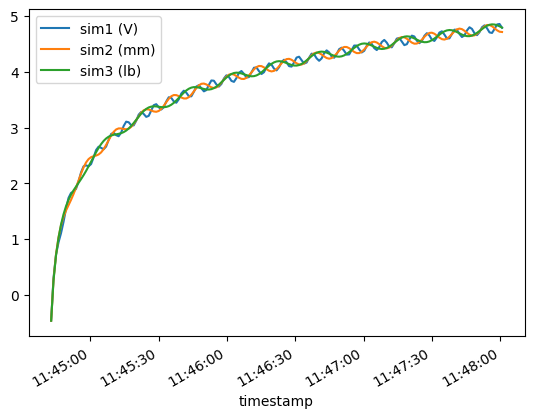

In [42]:
def add_scaled_columns(df, scaling_traits):
    new_df = df.copy()
    for column in new_df:
        name = column
        traits = scaling_traits.loc[name]

        scaled_name = f"{name} ({traits.Units})"
        scaled_data = (new_df[name] - traits.X0) / (traits.Vex * traits.CF)
        new_df[scaled_name] = scaled_data
    return new_df

scaled_data = add_scaled_columns(data, sensor_traits).iloc[:,-sensor_count::]
display(scaled_data.head())
scaled_axes = scaled_data.plot.line()